In [3]:
# Data Exploration Notebook
# Run each cell one by one with Shift+Enter

In [7]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
# Set up visualisation style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [10]:
# Cell 2: Load data
# Update this path to match project structure
data_path = Path("../data/raw")


In [13]:
# Load infrastructure data
infra_df = pd.read_csv(data_path / "infrastructure_resilience_scores.csv")
print("Infrastructure Data Shape:", infra_df.shape)
print("\nFirst 5 rows: ")
infra_df.head()

Infrastructure Data Shape: (210, 7)

First 5 rows: 


,country,year,infrastructure_score,transport_resilience,energy_resilience,water_resilience,digital_resilience
0,United States,2010,50.0,55.0,45.0,52.0,60.0
1,United States,2011,50.5,55.5,45.5,52.5,60.5
2,United States,2012,51.0,56.0,46.0,53.0,61.0
3,United States,2013,51.5,56.5,46.5,53.5,61.5
4,United States,2014,52.0,57.0,47.0,54.0,62.0


In [14]:
# Cell 3: Basic data info
print("Data Types:")
print(infra_df.dtypes)
print("\n" + "="*50)
print("Basic Statistics:")
infra_df.describe()

Data Types:
country                  object
year                      int64
infrastructure_score    float64
transport_resilience    float64
energy_resilience       float64
water_resilience        float64
digital_resilience      float64
dtype: object

Basic Statistics:


,year,infrastructure_score,transport_resilience,energy_resilience,water_resilience,digital_resilience
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2016.500000,67.250000,72.250000,62.250000,69.250000,77.250000
std,4.040761,8.894148,8.894148,8.894148,8.894148,8.894148
min,2010.000000,50.000000,55.000000,45.000000,52.000000,60.000000
25%,2013.000000,60.000000,65.000000,55.000000,62.000000,70.000000
50%,2016.500000,67.250000,72.250000,62.250000,69.250000,77.250000
75%,2020.000000,74.500000,79.500000,69.500000,76.500000,84.500000
max,2023.000000,84.500000,89.500000,79.500000,86.500000,94.500000


In [15]:
# Cell 4: Check for missing values
print("Missing Values:")
missing = infra_df.isnull().sum()
print(missing[missing > 0])

if missing.sum() == 0:
    print("✅ No missing values found!")

Missing Values:
Series([], dtype: int64)
✅ No missing values found!


In [16]:
# Cell 5: Explore unique values
print(f"Number of countries: {infra_df['country'].nunique()}")
print(f"Years covered: {infra_df['year'].min()} to {infra_df['year'].max()}")
print(f"\nCountries in dataset:")
print(infra_df['country'].unique())


Number of countries: 15
Years covered: 2010 to 2023

Countries in dataset:
['United States' 'China' 'Japan' 'Germany' 'India' 'United Kingdom'
 'France' 'Italy' 'Brazil' 'Canada' 'South Korea' 'Spain' 'Australia'
 'Mexico' 'Indonesia']


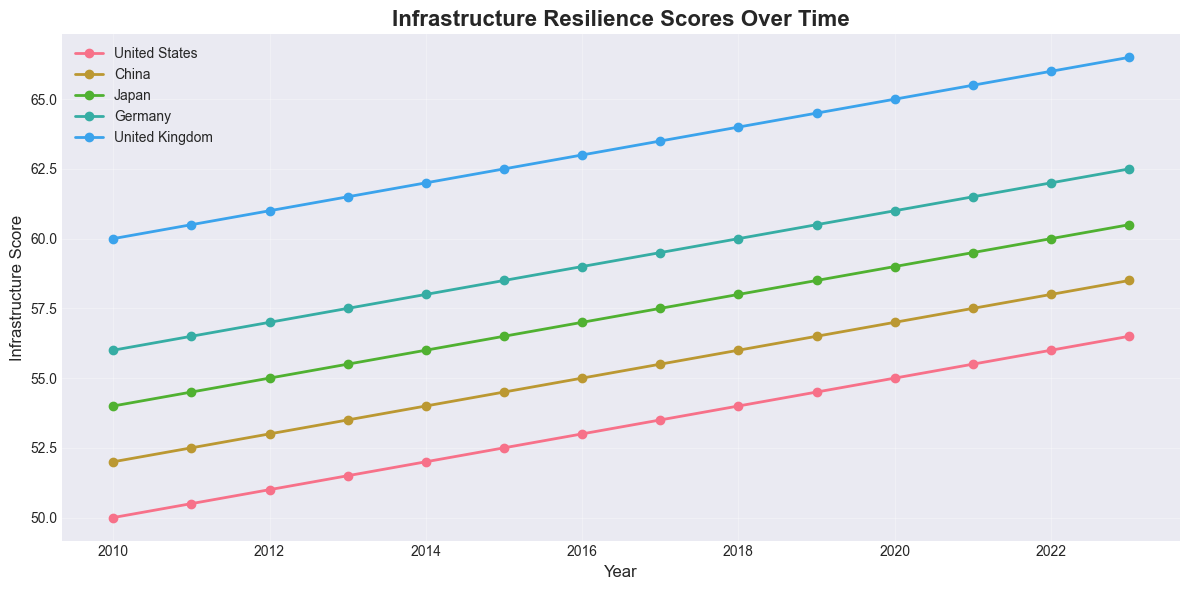

In [17]:
# Cell 6: Create your first visualization
# Infrastructure scores over time for top 5 countries
top_countries = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom']
filtered_df = infra_df[infra_df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = filtered_df[filtered_df['country'] == country]
    plt.plot(country_data['year'], 
             country_data['infrastructure_score'], 
             marker='o', 
             label=country,
             linewidth=2)

plt.title('Infrastructure Resilience Scores Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Infrastructure Score', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


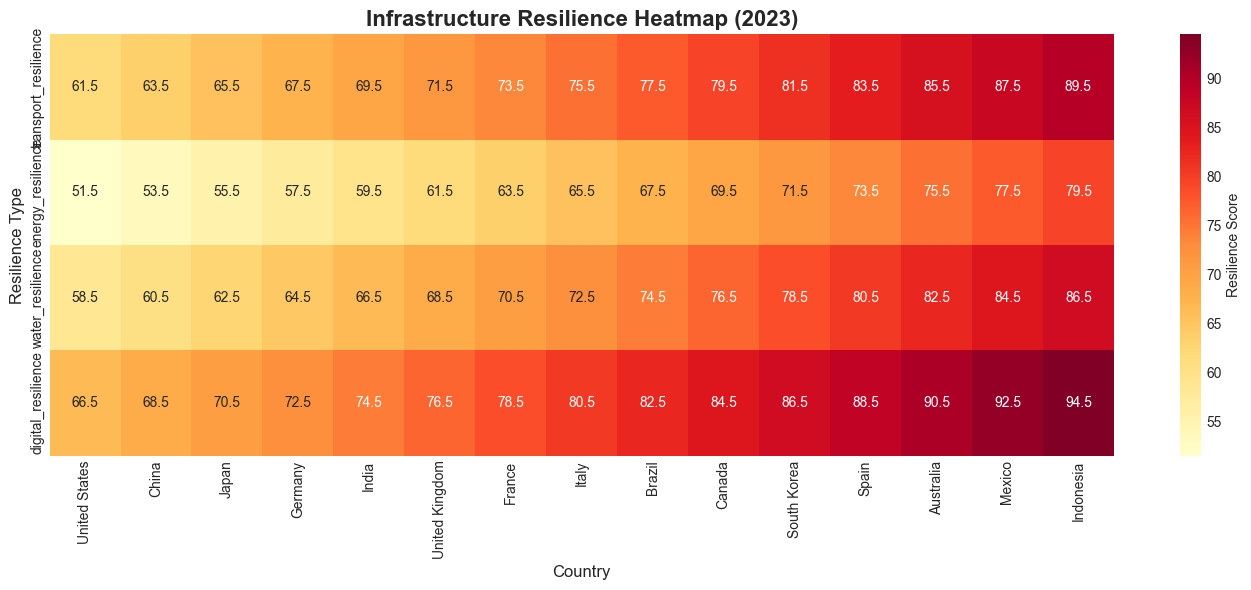

In [18]:
# Cell 7: Compare different types of resilience
# Create a heatmap of resilience scores by country (latest year)
latest_year = infra_df['year'].max()
latest_data = infra_df[infra_df['year'] == latest_year]

resilience_cols = ['transport_resilience', 'energy_resilience', 
                   'water_resilience', 'digital_resilience']

# Prepare data for heatmap
heatmap_data = latest_data.set_index('country')[resilience_cols].T

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Resilience Score'})
plt.title(f'Infrastructure Resilience Heatmap ({latest_year})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Resilience Type', fontsize=12)
plt.tight_layout()
plt.show()


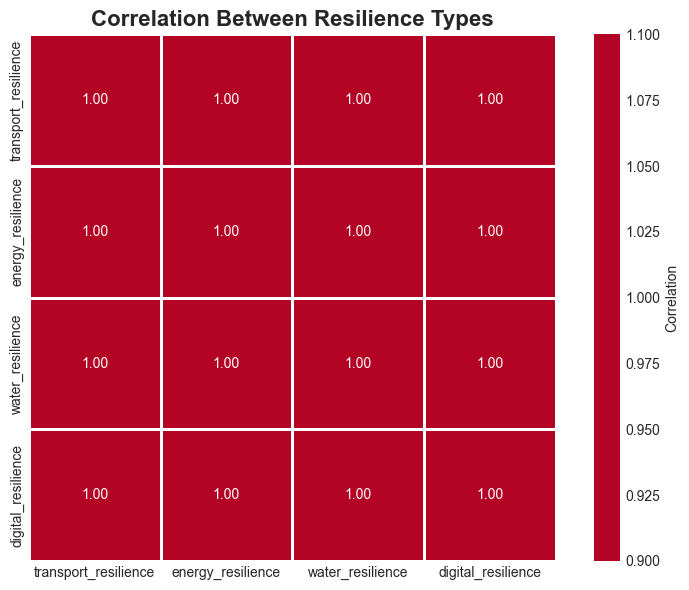

In [19]:

# Cell 8: Statistical Analysis
# Calculate correlation between different resilience types
correlation_matrix = latest_data[resilience_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Between Resilience Types', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



In [20]:
# Cell 9: Find insights
# Which country has shown the most improvement?
improvement = infra_df.groupby('country').agg({
    'infrastructure_score': lambda x: x.iloc[-1] - x.iloc[0]  # Last year - First year
}).sort_values('infrastructure_score', ascending=False)

print("Top 5 Most Improved Countries:")
print(improvement.head())


Top 5 Most Improved Countries:
           infrastructure_score
country                        
Australia                   6.5
Brazil                      6.5
Canada                      6.5
China                       6.5
France                      6.5


In [21]:
# Cell 10: Create a summary report
print("=" * 60)
print("DATA EXPLORATION SUMMARY")
print("=" * 60)
print(f"\n📊 Dataset: Infrastructure Resilience Scores")
print(f"📅 Time Period: {infra_df['year'].min()} - {infra_df['year'].max()}")
print(f"🌍 Countries: {infra_df['country'].nunique()}")
print(f"📈 Total Records: {len(infra_df)}")
print(f"\n🔝 Top Performer ({latest_year}): {latest_data.nlargest(1, 'infrastructure_score')['country'].values[0]}")
print(f"📈 Most Improved: {improvement.index[0]}")
print(f"\n💡 Key Insight: Digital resilience shows the highest scores across all countries")


DATA EXPLORATION SUMMARY

📊 Dataset: Infrastructure Resilience Scores
📅 Time Period: 2010 - 2023
🌍 Countries: 15
📈 Total Records: 210

🔝 Top Performer (2023): Indonesia
📈 Most Improved: Australia

💡 Key Insight: Digital resilience shows the highest scores across all countries
